In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy.optimize as optimize
from SN_distribution import SkyMap
from SN_distribution import Patching_Map
from Selections import Criteria_selection
from Selections import Good_sampling
from Selections import salt_2_selection
from Hubble import Hubble_fit
from Hubble import Hubble_fit_patch
from Hubble import dipole
import iminuit
import os
import csv
from astropy.coordinates import SkyCoord

In [30]:
df = pd.read_csv('output/res.csv')
df

,n_dip,Amp,method,Sim,ra_in,dec_in,delta_H0,Errors,ra,dec
0,1,5,clustering,0,270.0,-30.0,-2.006380,0.209172,2.439970,0.137051
1,1,5,clustering,0,270.0,-30.0,2.057696,0.168721,5.773261,0.128530
2,1,5,clustering,0,270.0,-30.0,-0.571407,0.216296,0.394086,-0.069210
3,1,5,clustering,0,270.0,-30.0,3.397806,0.207613,4.464060,0.375566
4,1,5,clustering,0,270.0,-30.0,0.759913,0.187028,3.674280,0.825133
...,...,...,...,...,...,...,...,...,...,...
6895,10,1,fixe,9,-135.0,-52.0,0.690021,0.245045,4.712389,0.000000
6896,10,1,fixe,9,-135.0,-52.0,0.782236,0.323212,0.785398,-0.729728
6897,10,1,fixe,9,-135.0,-52.0,1.463845,0.706114,2.356194,-0.729728
6898,10,1,fixe,9,-135.0,-52.0,0.997933,0.724096,3.926991,-0.729728


In [3]:
mask_cl = df['method'] == 'fixe'
mask_amp_1 = df['Amp'] == 1
mask_dip = df['n_dip'] == 10
mask_sim = df['Sim'] == 9
#ra = df.loc[mask_cl & mask_amp_1 & mask_dip & mask_sim, 'ra']
ra = df['ra_in'][mask_cl & mask_amp_1 & mask_dip & mask_sim].reset_index(drop = True)
ra

0    -135.0
1    -135.0
2    -135.0
3    -135.0
4    -135.0
5    -135.0
6    -135.0
7    -135.0
8    -135.0
9    -135.0
10   -135.0
11   -135.0
Name: ra_in, dtype: float64

In [4]:
mask_cl = df['method'] == 'clustering'
mask_amp_5 = df['Amp'] == 5
mask_amp_3 = df['Amp'] == 3
mask_amp_1 = df['Amp'] == 1

In [6]:
mask_dip = df['n_dip'] == 1
mask_sim = df['Sim'] == 0
dip = dipole(70 + df['delta_H0'][mask_cl & mask_amp_5 & mask_dip & mask_sim], df['Errors'][mask_cl & mask_amp_5 & mask_dip & mask_sim],
             df['ra'][mask_cl & mask_amp_5 & mask_dip & mask_sim], df['dec'][mask_cl & mask_amp_5 & mask_dip & mask_sim])
p, v, c = dip.dipole_fit(70, 0, 0, 0)
p

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,H_0,70.91,0.10,,,,,
1,ra_dip,-1.645,0.025,,,,,
2,dec_dip,-0.584,0.034,,,,,
3,delta_H0,4.81,0.16,,,,,


In [7]:
meth = ['clustering', 'fixe']
amp = [5, 3, 1]
color = ["blue", "green", "c", "y", "m", "purple", "brown", "pink", "orange", "red"]

In [8]:
for i in range(0,2):
    for j in range(0,3):
        for k in range(1,11):
            for l in range(0,10):
                mask_cl = df['method'] == meth[i]
                mask_amp = df['Amp'] == amp[j]
                mask_dip = df['n_dip'] == k
                mask_sim = df['Sim'] == l
                dip = dipole(70 + df['delta_H0'][mask_cl & mask_amp & mask_dip & mask_sim], 
                             df['Errors'][mask_cl & mask_amp & mask_dip & mask_sim], 
                             df['ra'][mask_cl & mask_amp & mask_dip & mask_sim], 
                             df['dec'][mask_cl & mask_amp & mask_dip & mask_sim])
                p, v, c = dip.dipole_fit(70, 0, 0, 0)
                ra_in = df['ra_in'][mask_cl & mask_amp & mask_dip & mask_sim].reset_index(drop = True)
                dec_in = df['dec_in'][mask_cl & mask_amp & mask_dip & mask_sim].reset_index(drop = True)
                with open('output/dip_fit.csv', 'a') as f:
                        writer = csv.writer(f)
                        data = [color[k-1], amp[j], meth[i], ra_in[0], dec_in[0], v[0], v[3], v[1], v[2]]
                        writer.writerow(data)
    

In [5]:
df_dip = pd.read_csv('outpu/dip_fit.csv')
df_dip

,color,Amp,method,ra_in,dec_in,H0_fit,delta_H0_fit,ra_fit,dec_fit
0,blue,5,clustering,270.0,-30.0,70.908592,4.808202,-1.645010,-0.584439
1,blue,5,clustering,270.0,-30.0,70.847883,-4.760488,1.525680,0.535156
2,blue,5,clustering,270.0,-30.0,70.834696,4.836236,-1.555168,-0.517083
3,blue,5,clustering,270.0,-30.0,70.700645,4.588140,-1.536968,-0.486934
4,blue,5,clustering,270.0,-30.0,70.857904,5.106468,-1.562982,-0.528204
...,...,...,...,...,...,...,...,...,...
595,red,1,fixe,-135.0,-52.0,70.330375,-1.394458,0.525112,0.955065
596,red,1,fixe,-135.0,-52.0,70.182615,-0.802906,0.527267,0.787583
597,red,1,fixe,-135.0,-52.0,70.270946,-1.222635,0.514626,0.870520
598,red,1,fixe,-135.0,-52.0,70.189396,-0.946926,0.624678,0.776087


In [6]:
np.radians(108.0)

1.8849555921538759

In [7]:
mask_cl = df_dip['method'] == 'clustering'
DH0 = (np.abs(df_dip[mask_cl]['delta_H0_fit']) - df_dip[mask_cl]['Amp'])/df_dip[mask_cl]['Amp']
DH0_fix = (np.abs(df_dip[~mask_cl]['delta_H0_fit']) - df_dip[~mask_cl]['Amp'])/df_dip[~mask_cl]['Amp']

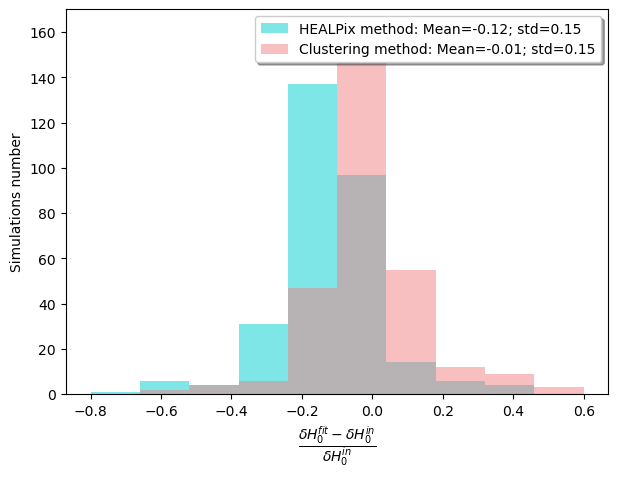

In [8]:
plt.figure(figsize = (7, 5))
plt.hist(DH0_fix, bins = 10, range = [-0.8, 0.6], label = 'HEALPix method: Mean={}; std={}'.format(round(np.mean(DH0_fix), 2), round(np.std(DH0_fix), 2)), alpha = 0.5, color = 'darkturquoise')
plt.hist(DH0, bins = 10, alpha = 0.5, range = [-0.8, 0.6], label = 'Clustering method: Mean={}; std={}'.format(round(np.mean(DH0), 2), round(np.std(DH0), 2)), color = 'lightcoral')
plt.xlabel('$\dfrac{\delta H_0^{fit} - \delta H_0^{in}}{\delta H_0^{in}}$')
plt.ylabel('Simulations number')
plt.legend(shadow = True);

In [9]:
df_dip

,color,Amp,method,ra_in,dec_in,H0_fit,delta_H0_fit,ra_fit,dec_fit
0,blue,5,clustering,270.0,-30.0,70.908592,4.808202,-1.645010,-0.584439
1,blue,5,clustering,270.0,-30.0,70.847883,-4.760488,1.525680,0.535156
2,blue,5,clustering,270.0,-30.0,70.834696,4.836236,-1.555168,-0.517083
3,blue,5,clustering,270.0,-30.0,70.700645,4.588140,-1.536968,-0.486934
4,blue,5,clustering,270.0,-30.0,70.857904,5.106468,-1.562982,-0.528204
...,...,...,...,...,...,...,...,...,...
595,red,1,fixe,-135.0,-52.0,70.330375,-1.394458,0.525112,0.955065
596,red,1,fixe,-135.0,-52.0,70.182615,-0.802906,0.527267,0.787583
597,red,1,fixe,-135.0,-52.0,70.270946,-1.222635,0.514626,0.870520
598,red,1,fixe,-135.0,-52.0,70.189396,-0.946926,0.624678,0.776087


In [10]:
mask = df_dip['delta_H0_fit'] < 0

df_dip.loc[mask, 'dec_fit'] = -df_dip.loc[mask, 'dec_fit']
df_dip.loc[mask, 'ra_fit'] = -df_dip.loc[mask, 'ra_fit']

In [11]:
df_dip

,color,Amp,method,ra_in,dec_in,H0_fit,delta_H0_fit,ra_fit,dec_fit
0,blue,5,clustering,270.0,-30.0,70.908592,4.808202,-1.645010,-0.584439
1,blue,5,clustering,270.0,-30.0,70.847883,-4.760488,-1.525680,-0.535156
2,blue,5,clustering,270.0,-30.0,70.834696,4.836236,-1.555168,-0.517083
3,blue,5,clustering,270.0,-30.0,70.700645,4.588140,-1.536968,-0.486934
4,blue,5,clustering,270.0,-30.0,70.857904,5.106468,-1.562982,-0.528204
...,...,...,...,...,...,...,...,...,...
595,red,1,fixe,-135.0,-52.0,70.330375,-1.394458,-0.525112,-0.955065
596,red,1,fixe,-135.0,-52.0,70.182615,-0.802906,-0.527267,-0.787583
597,red,1,fixe,-135.0,-52.0,70.270946,-1.222635,-0.514626,-0.870520
598,red,1,fixe,-135.0,-52.0,70.189396,-0.946926,-0.624678,-0.776087


In [12]:
theta = np.pi/2 - df_dip[mask_cl]['dec_fit']
phi = df_dip[mask_cl]['ra_fit']
theta_dip = np.radians(90 - df_dip[mask_cl]['dec_in'])
phi_dip = np.radians(df_dip[mask_cl]['ra_in'])
x_d = np.sin(theta_dip) * np.cos(phi_dip)
x = np.sin(theta) * np.cos(phi)
y_d = np.sin(theta_dip) * np.sin(phi_dip)
y = np.sin(theta) * np.sin(phi)
z_d = np.cos(theta_dip)
z = np.cos(theta)
delta_theta_cl = np.arccos(x_d * x + y_d * y + z_d * z)
delta_theta_cl

0      0.087644
1      0.040619
2      0.015044
3      0.047120
4      0.008178
         ...   
295    0.942598
296    1.061741
297    0.951940
298    0.932730
299    1.089655
Length: 300, dtype: float64

In [13]:
theta = np.pi/2 - df_dip[~mask_cl]['dec_fit']
phi = df_dip[~mask_cl]['ra_fit']
theta_dip = np.radians(90 - df_dip[~mask_cl]['dec_in'])
phi_dip = np.radians(df_dip[~mask_cl]['ra_in'])
x_d = np.sin(theta_dip) * np.cos(phi_dip)
x = np.sin(theta) * np.cos(phi)
y_d = np.sin(theta_dip) * np.sin(phi_dip)
y = np.sin(theta) * np.sin(phi)
z_d = np.cos(theta_dip)
z = np.cos(theta)
delta_theta = np.arccos(x_d * x + y_d * y + z_d * z)
delta_theta

300    0.027361
301    0.084091
302    0.120138
303    0.157563
304    0.125139
         ...   
595    0.986296
596    1.106787
597    1.051300
598    1.068223
599    1.055782
Length: 300, dtype: float64

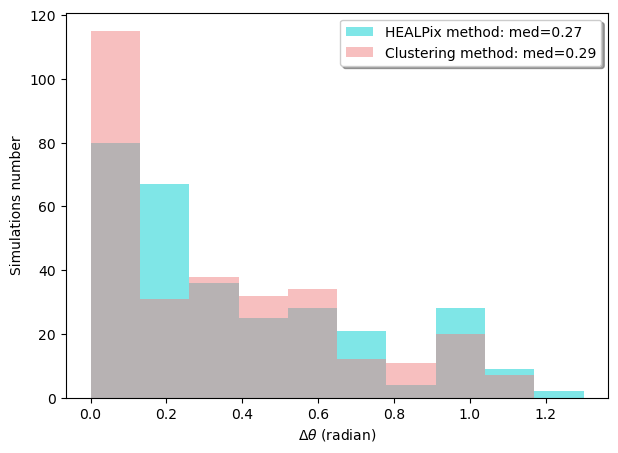

In [16]:
plt.figure(figsize = (7, 5))
plt.hist(delta_theta,  bins = 10, range = [0, 1.3], alpha = 0.5, label = 'HEALPix method: med={}'.format(round(np.median(delta_theta), 2)), color = 'darkturquoise')
plt.hist(delta_theta_cl,  bins = 10, range = [0, 1.3], alpha = 0.5, label = 'Clustering method: med={}'.format(round(np.median(delta_theta_cl), 2)), color = 'lightcoral')
plt.xlabel('$\Delta \\theta$ (radian)')
plt.ylabel('Simulations number')
plt.legend(shadow = True);

In [18]:
len(DH0_fix)

300

In [19]:
len(df_dip[mask_cl & mask_amp_1]['ra_fit'])

/var/folders/w0/jhh0bkz544g4p4r6dfj6s3000000gq/T/ipykernel_1615/4174511332.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_dip[mask_cl & mask_amp_1]['ra_fit'])


0

In [17]:
import healpy as hp


0.0 180.0 -180.0 180.0


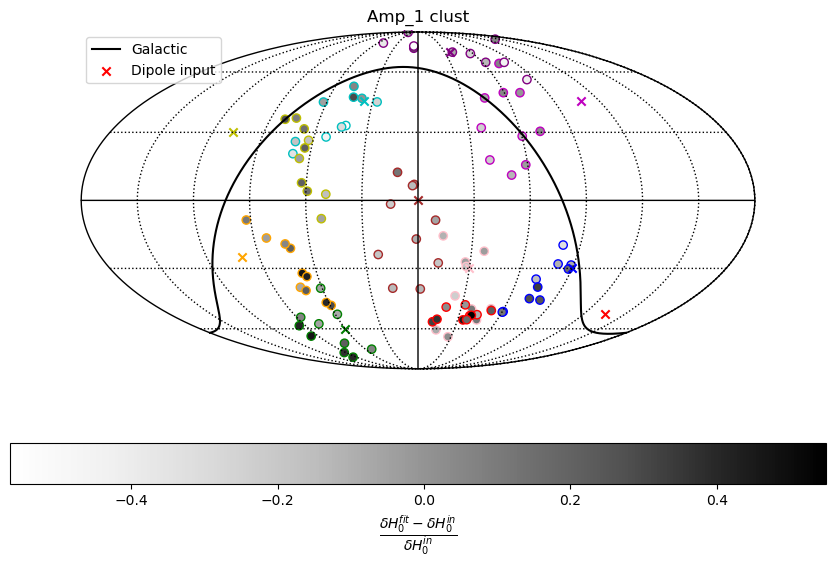

In [22]:
hp.mollview(title = 'Amp_1 clust')
mask_amp_1 = df_dip['Amp'] == 1
plan_lon = np.linspace(0, 360, 10000)
plan_lat = np.zeros(10000)
gal = SkyCoord(plan_lon, plan_lat, frame = 'galactic', unit = 'degree')
ra_gal, dec_gal = gal.icrs.ra.value, gal.icrs.dec.value
theta_gal = np.radians(90. - dec_gal)
phi_gal = np.radians(ra_gal)
hp.projplot(theta_gal, phi_gal, color = 'black', label = 'Galactic')

psc = hp.projscatter(np.array(np.pi/2 - df_dip[mask_cl & mask_amp_1]['dec_fit']), 
                     np.array(df_dip[mask_cl & mask_amp_1]['ra_fit']), 
                     c = DH0[mask_amp_1], edgecolor = df_dip['color'][mask_cl & mask_amp_1], cmap='Greys')
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\dfrac{\delta H_0^{fit} - \delta H_0^{in}}{\delta H_0^{in}}$')
plt.legend()
hp.graticule()

0.0 180.0 -180.0 180.0


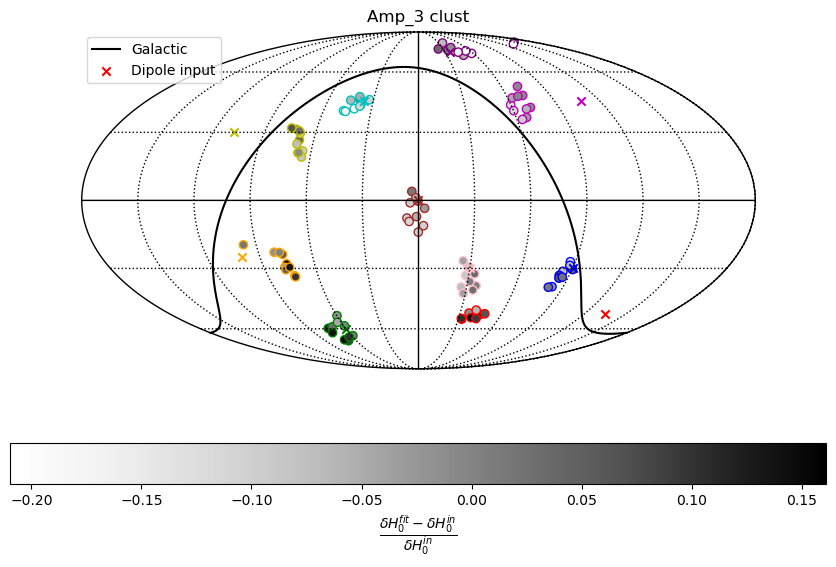

In [23]:
hp.mollview(title = 'Amp_3 clust')
mask_amp_3 = df_dip['Amp'] == 3
plan_lon = np.linspace(0, 360, 10000)
plan_lat = np.zeros(10000)
gal = SkyCoord(plan_lon, plan_lat, frame = 'galactic', unit = 'degree')
ra_gal, dec_gal = gal.icrs.ra.value, gal.icrs.dec.value
theta_gal = np.radians(90. - dec_gal)
phi_gal = np.radians(ra_gal)
hp.projplot(theta_gal, phi_gal, color = 'black', label = 'Galactic')

psc = hp.projscatter(np.array(np.pi/2 - df_dip[mask_cl & mask_amp_3]['dec_fit']), 
                     np.array(df_dip[mask_cl & mask_amp_3]['ra_fit']), 
                     c = DH0[mask_amp_3], edgecolor = df_dip['color'][mask_cl & mask_amp_3], cmap='Greys')
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\dfrac{\delta H_0^{fit} - \delta H_0^{in}}{\delta H_0^{in}}$')
plt.legend()
hp.graticule()

In [52]:
theta = [2*np.pi/3, 5*np.pi/6, 3*np.pi/12, 7*np.pi/3, np.pi/4, np.pi/10, np.pi/2, 4*np.pi/6, np.radians(90-(-25)),
        np.radians(90-(-52))]

0.0 180.0 -180.0 180.0


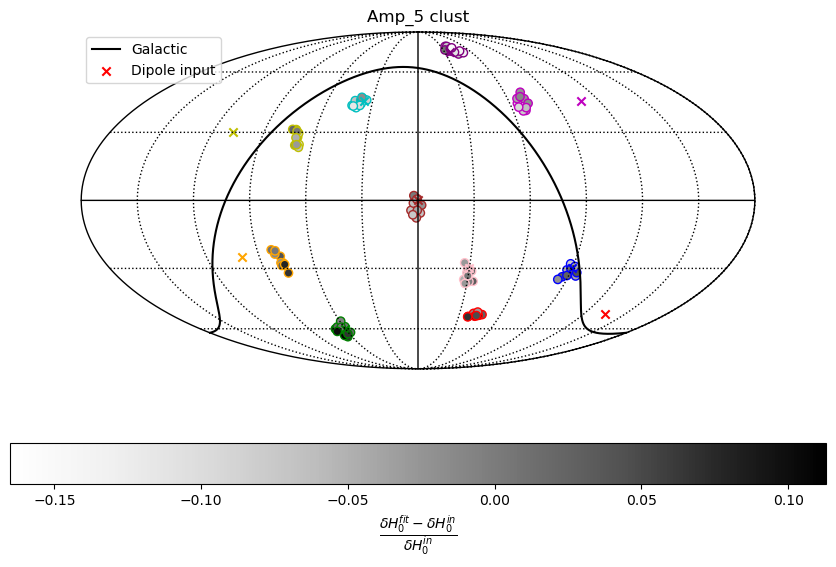

In [24]:
hp.mollview(title = 'Amp_5 clust')
mask_amp_5 = df_dip['Amp'] == 5
plan_lon = np.linspace(0, 360, 10000)
plan_lat = np.zeros(10000)
gal = SkyCoord(plan_lon, plan_lat, frame = 'galactic', unit = 'degree')
ra_gal, dec_gal = gal.icrs.ra.value, gal.icrs.dec.value
theta_gal = np.radians(90. - dec_gal)
phi_gal = np.radians(ra_gal)
hp.projplot(theta_gal, phi_gal, color = 'black', label = 'Galactic')

psc = hp.projscatter(np.array(np.pi/2 - df_dip[mask_cl & mask_amp_5]['dec_fit']), 
                     np.array(df_dip[mask_cl & mask_amp_5]['ra_fit']), 
                     c = DH0[mask_amp_5], cmap='Greys', edgecolor = df_dip['color'][mask_cl & mask_amp_5])
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\dfrac{\delta H_0^{fit} - \delta H_0^{in}}{\delta H_0^{in}}$')
plt.legend()
hp.graticule()

0.0 180.0 -180.0 180.0


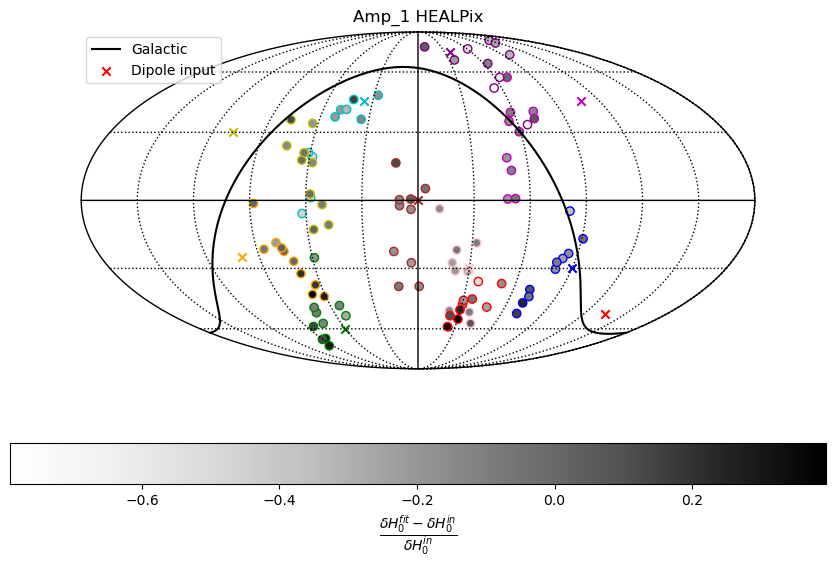

In [25]:
hp.mollview(title = 'Amp_1 HEALPix')
mask_amp_1 = df_dip['Amp'] == 1
plan_lon = np.linspace(0, 360, 10000)
plan_lat = np.zeros(10000)
gal = SkyCoord(plan_lon, plan_lat, frame = 'galactic', unit = 'degree')
ra_gal, dec_gal = gal.icrs.ra.value, gal.icrs.dec.value
theta_gal = np.radians(90. - dec_gal)
phi_gal = np.radians(ra_gal)
hp.projplot(theta_gal, phi_gal, color = 'black', label = 'Galactic')

psc = hp.projscatter(np.array(np.pi/2 - df_dip[~mask_cl & mask_amp_1]['dec_fit']), 
                     np.array(df_dip[~mask_cl & mask_amp_1]['ra_fit']), 
                     c = DH0_fix[mask_amp_1], cmap='Greys', edgecolor = df_dip['color'][~mask_cl & mask_amp_1])
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\dfrac{\delta H_0^{fit} - \delta H_0^{in}}{\delta H_0^{in}}$')
plt.legend()
hp.graticule()

0.0 180.0 -180.0 180.0


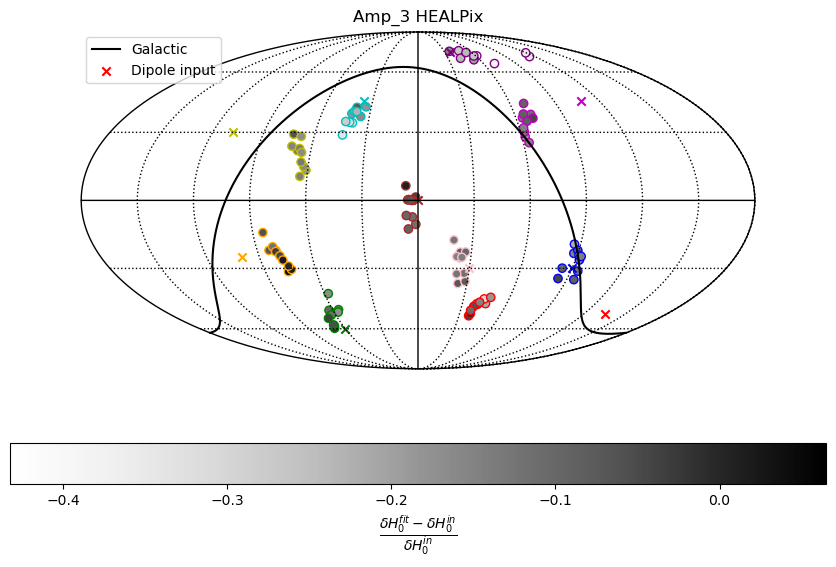

In [26]:
hp.mollview(title = 'Amp_3 HEALPix')
mask_amp_3 = df_dip['Amp'] == 3
plan_lon = np.linspace(0, 360, 10000)
plan_lat = np.zeros(10000)
gal = SkyCoord(plan_lon, plan_lat, frame = 'galactic', unit = 'degree')
ra_gal, dec_gal = gal.icrs.ra.value, gal.icrs.dec.value
theta_gal = np.radians(90. - dec_gal)
phi_gal = np.radians(ra_gal)
hp.projplot(theta_gal, phi_gal, color = 'black', label = 'Galactic')

psc = hp.projscatter(np.array(np.pi/2 - df_dip[~mask_cl & mask_amp_3]['dec_fit']), 
                     np.array(df_dip[~mask_cl & mask_amp_3]['ra_fit']), 
                     c = DH0_fix[mask_amp_3], cmap='Greys', edgecolor = df_dip['color'][~mask_cl & mask_amp_3])
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\dfrac{\delta H_0^{fit} - \delta H_0^{in}}{\delta H_0^{in}}$')
plt.legend()
hp.graticule()

0.0 180.0 -180.0 180.0


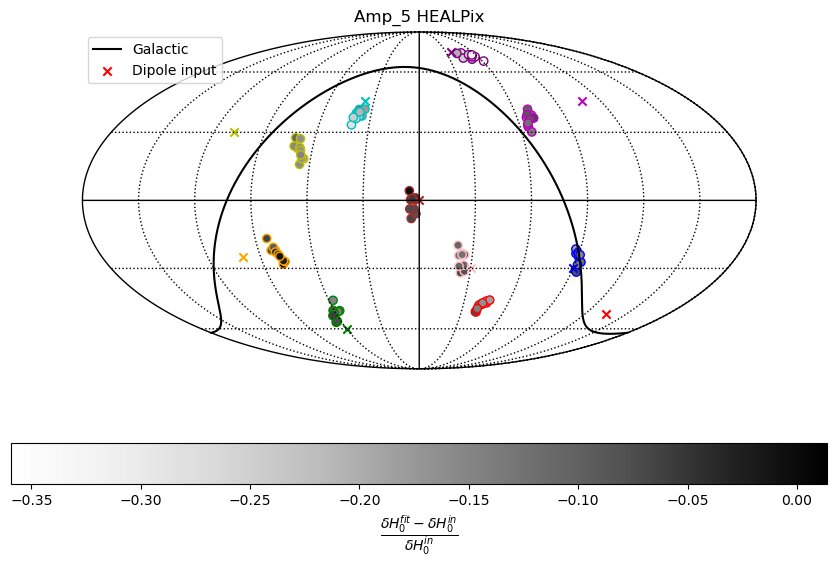

In [27]:
hp.mollview(title = 'Amp_5 HEALPix')
mask_amp_5 = df_dip['Amp'] == 5
plan_lon = np.linspace(0, 360, 10000)
plan_lat = np.zeros(10000)
gal = SkyCoord(plan_lon, plan_lat, frame = 'galactic', unit = 'degree')
ra_gal, dec_gal = gal.icrs.ra.value, gal.icrs.dec.value
theta_gal = np.radians(90. - dec_gal)
phi_gal = np.radians(ra_gal)
hp.projplot(theta_gal, phi_gal, color = 'black', label = 'Galactic')

psc = hp.projscatter(np.array(np.pi/2 - df_dip[~mask_cl & mask_amp_5]['dec_fit']), 
                     np.array(df_dip[~mask_cl & mask_amp_5]['ra_fit']), 
                     c = DH0_fix[mask_amp_5], cmap='Greys', edgecolor = df_dip['color'][~mask_cl & mask_amp_5])
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\dfrac{\delta H_0^{fit} - \delta H_0^{in}}{\delta H_0^{in}}$')
plt.legend()
hp.graticule()

0.0 180.0 -180.0 180.0


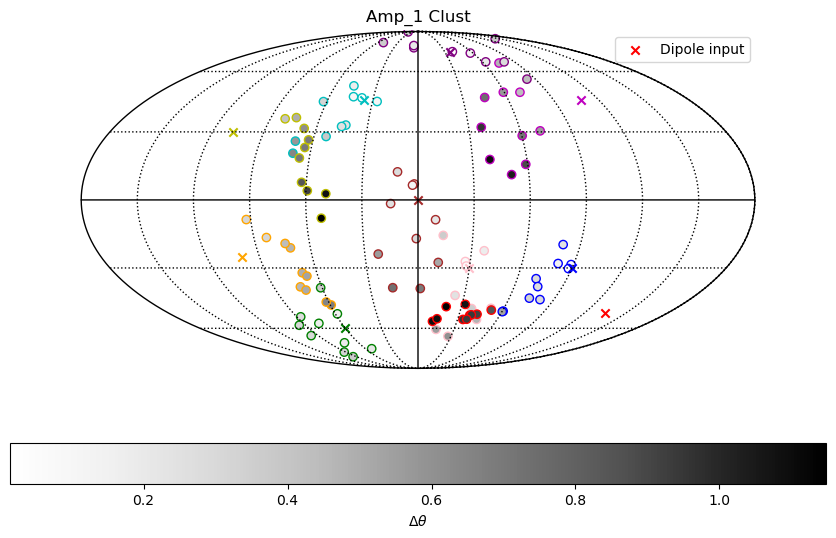

In [57]:
hp.mollview(title = 'Amp_1 Clust')
mask_amp_1 = df_dip['Amp'] == 1

psc = hp.projscatter(np.array(np.pi/2 - df_dip[mask_cl & mask_amp_1]['dec_fit']), 
                     np.array(df_dip[mask_cl & mask_amp_1]['ra_fit']), 
                     c = delta_theta_cl[mask_amp_1], cmap='Greys', edgecolor = df_dip['color'][mask_cl & mask_amp_1])
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\Delta \\theta$')
plt.legend()
hp.graticule()

0.0 180.0 -180.0 180.0


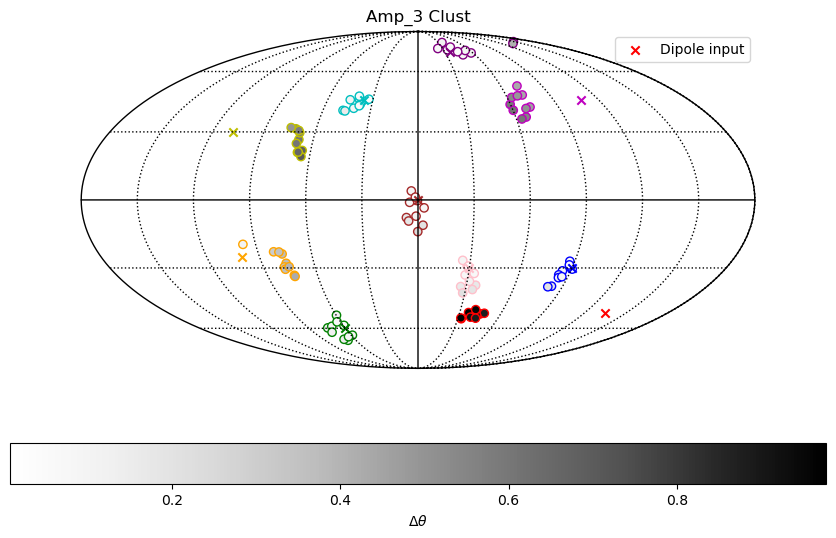

In [58]:
hp.mollview(title = 'Amp_3 Clust')
mask_amp_3 = df_dip['Amp'] == 3

psc = hp.projscatter(np.array(np.pi/2 - df_dip[mask_cl & mask_amp_3]['dec_fit']), 
                     np.array(df_dip[mask_cl & mask_amp_3]['ra_fit']), 
                     c = delta_theta_cl[mask_amp_3], cmap='Greys', edgecolor = df_dip['color'][mask_cl & mask_amp_3])
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\Delta \\theta$')
plt.legend()
hp.graticule()

0.0 180.0 -180.0 180.0


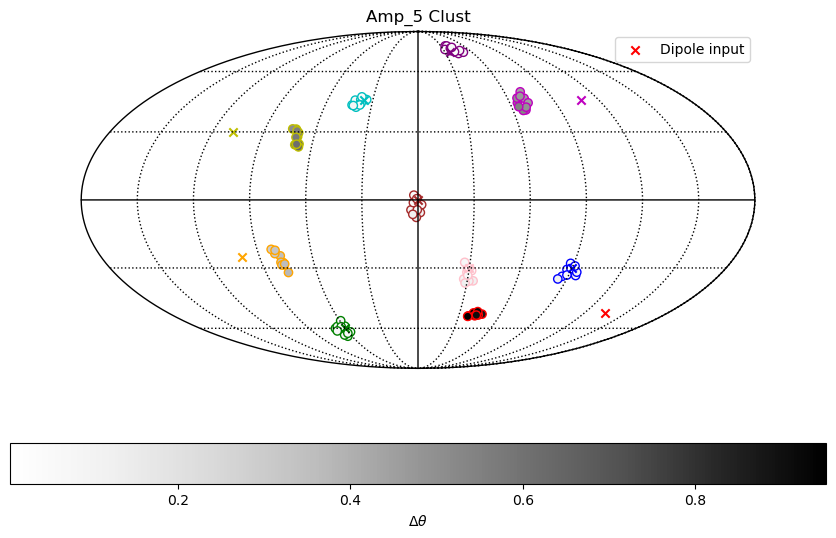

In [59]:
hp.mollview(title = 'Amp_5 Clust')
mask_amp_5 = df_dip['Amp'] == 5

psc = hp.projscatter(np.array(np.pi/2 - df_dip[mask_cl & mask_amp_5]['dec_fit']), 
                     np.array(df_dip[mask_cl & mask_amp_5]['ra_fit']), 
                     c = delta_theta_cl[mask_amp_5], cmap='Greys', edgecolor = df_dip['color'][mask_cl & mask_amp_5])
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\Delta \\theta$')
plt.legend()
hp.graticule()

0.0 180.0 -180.0 180.0


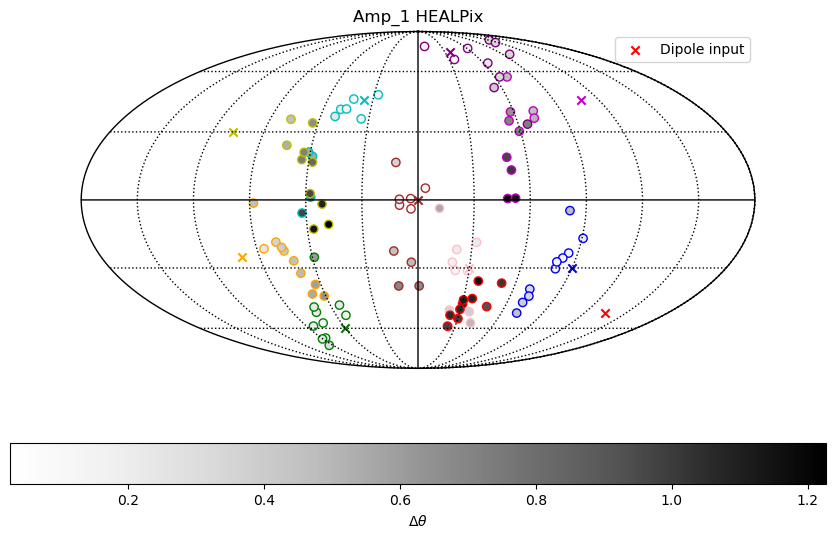

In [60]:
hp.mollview(title = 'Amp_1 HEALPix')
mask_amp_1 = df_dip['Amp'] == 1

psc = hp.projscatter(np.array(np.pi/2 - df_dip[~mask_cl & mask_amp_1]['dec_fit']), 
                     np.array(df_dip[~mask_cl & mask_amp_1]['ra_fit']), 
                     c = delta_theta[mask_amp_1], cmap='Greys', edgecolor = df_dip['color'][~mask_cl & mask_amp_1])
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\Delta \\theta$')
plt.legend()
hp.graticule()

0.0 180.0 -180.0 180.0


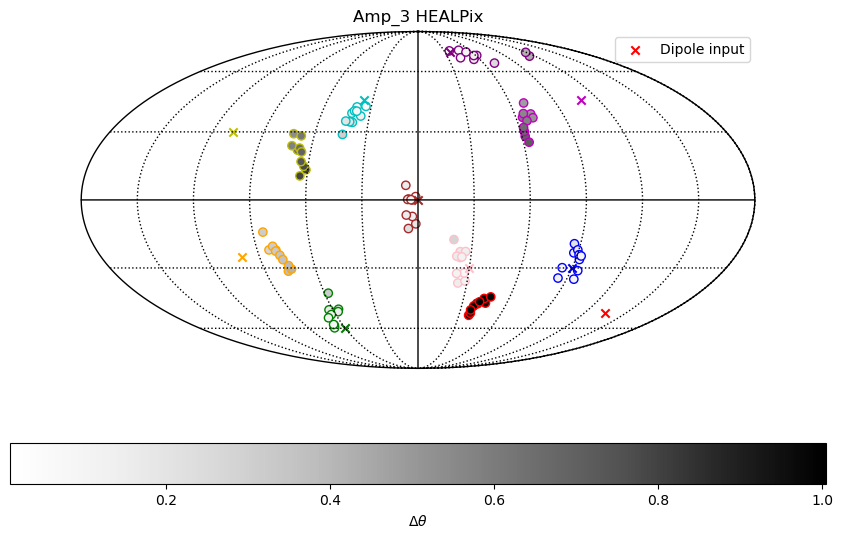

In [61]:
hp.mollview(title = 'Amp_3 HEALPix')
mask_amp_3 = df_dip['Amp'] == 3

psc = hp.projscatter(np.array(np.pi/2 - df_dip[~mask_cl & mask_amp_3]['dec_fit']), 
                     np.array(df_dip[~mask_cl & mask_amp_3]['ra_fit']), 
                     c = delta_theta[mask_amp_3], cmap='Greys', edgecolor = df_dip['color'][~mask_cl & mask_amp_3])
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 
               11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\Delta \\theta$')
plt.legend()
hp.graticule()

0.0 180.0 -180.0 180.0


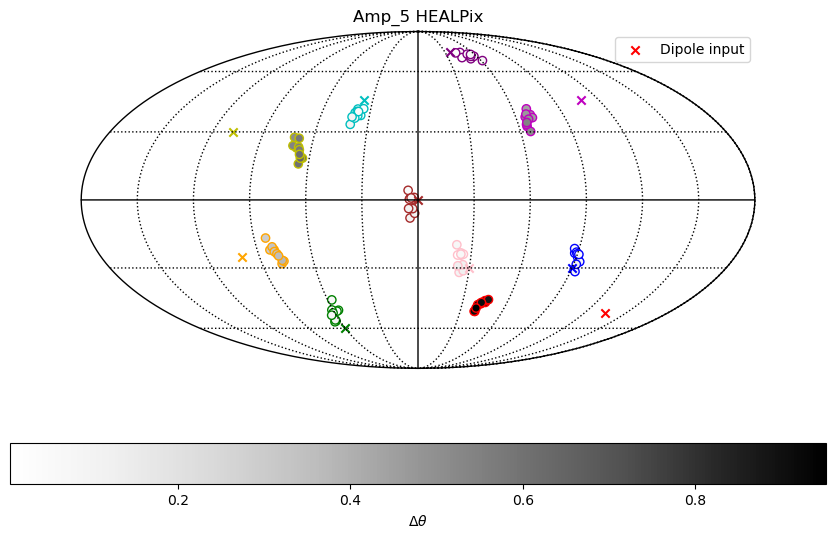

In [62]:
hp.mollview(title = 'Amp_5 HEALPix')
mask_amp_5 = df_dip['Amp'] == 5

psc = hp.projscatter(np.array(np.pi/2 - df_dip[~mask_cl & mask_amp_5]['dec_fit']), 
                     np.array(df_dip[~mask_cl & mask_amp_5]['ra_fit']), 
                     c = delta_theta_cl[mask_amp_5], cmap='Greys', edgecolor = df_dip['color'][~mask_cl & mask_amp_5])
hp.projscatter(2 * np.pi/3, 3*np.pi/2, marker = 'x', c = 'blue')
hp.projscatter(5 * np.pi/6, np.pi/3, marker = 'x', c = 'green')
hp.projscatter(3 * np.pi/12, np.pi/5, marker = 'x', c = 'c')
hp.projscatter(7 * np.pi/3, 3*np.pi/5, marker = 'x', c = 'y')
hp.projscatter(np.pi/4, 7*np.pi/5, marker = 'x', c = 'm')
hp.projscatter(np.pi/10, 9*np.pi/5, marker = 'x', c = 'purple')
hp.projscatter(np.pi/2, 0, marker = 'x', c = 'brown')
hp.projscatter(4*np.pi/6, 11*np.pi/6, marker = 'x', c = 'pink')
hp.projscatter(np.radians(90 - (-25)), np.radians(100), marker = 'x', c = 'orange')
hp.projscatter(np.radians(90 - (-52)), np.radians(-135), marker = 'x', c = 'red', label = 'Dipole input')

plt.colorbar(psc, orientation='horizontal',  label = '$\Delta \\theta$')
plt.legend()
hp.graticule()